# TALLER 6 JULIAN PENA

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df_col= pd.read_csv("ColombiaCB.csv")
df_col["Country"] = "Colombia"

In [76]:
df_col["Organization Name"].unique()

array(['La Haus', 'Elenas', 'Dondo', 'Tpaga', 'Aflore', 'Backstartup',
       'Polymath Ventures', 'Liftit', 'Chiper', 'Habi', 'Valiu', 'Rappi',
       'RobinFood', 'Zinobe', 'Tul', 'Mensajeros Urbanos', 'Omni Latam',
       'LAIKA', 'Finsocial', 'Vozy', 'Leal', 'UBITS', 'Superfuds',
       'Cubbo', 'Maestrik', 'Avista', 'Truora', 'Rebus Technology',
       'Ayenda Hotels', 'Finaktiva', 'ontop', 'Sempli', 'FLUVIP',
       'Demetria', 'Lentesplus', 'Bold', 'Mi Aguila', 'Foody',
       'MO Tecnologias', 'Farmalisto', 'LifeMiles', 'Mercadoni', 'Minka',
       'Domicilios.com', 'Picap', 'Simetrik', 'BEWE (formerly miora)',
       'Foodology', '1DOC3', 'CelerSMS', 'Peiky', 'Tributi', 'Aptuno',
       'Finco.co', 'Cobre', 'Rayo Credit Colombia', 'BioCredit',
       'doc-doc', 'Awake', 'CIVICO', 'LOGYSTO', 'Frubana', 'mesfix',
       'Avianca Holdings', 'Addi', 'Viva Air', 'LastFood', 'Fitpal',
       'Todos Comemos', 'Melonn', 'MUVO', 'Telemetrik', 'Ole', 'Neivor',
       'Puntored', 'Mandao

## Importamos de CBINSIGHTS Top Fintech Bogotá 

In [77]:
df_Col_Fintech= pd.read_csv("CBI_Col_Fintech.csv")
df_Col_Fintech

,Companies
0,Finsocial
1,A
2,Avista
3,La Haus
4,A
...,...
156,M
157,MovilPass
158,V
159,Vaki


### Veamos ahora el Dossier/reporte de estas compañias 

<img src="DOSIER1.png">

<img src="DOSIER2.png">

<img src="DOSIER3.png">

<img src="DOSIER4.png">

In [78]:
df_col= pd.read_csv("ColombiaCB.csv")
df_col["Country"] = "Colombia"
df_col= pd.read_csv("ColombiaCB.csv")
df_col["Country"] = "Colombia"
df_chi= pd.read_csv("ChileCB.csv")
df_chi["Country"] = "Chile"
df_bra= pd.read_csv("BrazilCB.csv")
df_bra["Country"] = "Brazil"
df_arg= pd.read_csv("ArgentinaCB.csv")
df_arg["Country"] = "Argentina"
df_mex= pd.read_csv("MexicoCB.csv")
df_mex["Country"] = "Mexico"
df_uru= pd.read_csv("UruguayCB.csv")
df_uru["Country"] = "Uruguay"

df_esp= pd.read_csv("SpainCB.csv")
df_esp["Country"] = "Spain"
df_sui= pd.read_csv("SwitzerlandCB.csv")
df_sui["Country"] = "Switzerland"
df_isr= pd.read_csv("IsraelCB.csv")
df_isr["Country"] = "Israel"
df_usa= pd.read_csv("UsaCB.csv")
df_usa["Country"] = "Usa"
df_all = pd.concat([df_col,df_chi,df_bra,df_arg, df_mex,df_uru, df_esp,df_sui, df_isr , df_usa] )
df_all = df_all.drop(["Organization Name URL"], axis=1)
df_all["Founded Date"] = pd.to_datetime(df_all["Founded Date"])
df_all["Exit Date"] = pd.to_datetime(df_all["Exit Date"])
df_all["Closed Date"] = pd.to_datetime(df_all["Closed Date"])
df_all["Last Funding Date"] = pd.to_datetime(df_all["Last Funding Date"])
df_all["Delisted Date"] = pd.to_datetime(df_all["Delisted Date"])
df_all["IPO Date"] = pd.to_datetime(df_all["IPO Date"])
df_startup = pd.read_excel("100startupcol.xlsx", index_col= 0)
df_startup =df_startup.rename(columns = {"1Doc3":"Startup"})
df_col_top_100 = pd.merge(df_col, df_startup, left_on="Organization Name", right_on= "Startup"  )
df_col_top_100 = df_col_top_100["Organization Name"].astype(str) 


startup_contained = []
startup_not_contained = []

df_colombia_company = df_all[ df_all['Country'] == 'Colombia' ]
list_colombia_company_names = df_colombia_company['Organization Name'].tolist()

for i in range(100):
    top_company_name = df_startup.iloc[i].Startup
    if top_company_name.upper() in (top_company_name.upper() for top_company_name in list_colombia_company_names):
        startup_contained.append(top_company_name)
    else:
        startup_not_contained.append(top_company_name)

print("[%d] estan contenidas, [%d] no estan contenidas"%(len(startup_contained),len(startup_not_contained)))

df_colombia_company["isInTop100"] = 0

pass

for company_name in startup_contained:
    df_colombia_company.loc[df_colombia_company['Organization Name'] == company_name, ['isInTop100']] = 1
    
df_col_top100= df_colombia_company
df_contactos = pd.read_excel("EUContactos.xlsx")
    
df_col_merge_1_bases = pd.merge(df_col_top100, df_contactos, left_on="Organization Name", right_on= "Name"  )


df_col_merge_2_bases = pd.merge(df_col, df_contactos, left_on="Organization Name", right_on= "Name"  )


df_col_merge_0_bases = pd.merge(df_col, df_startup, left_on="Organization Name", right_on= "Startup"  )


df_col_merge_3_bases = pd.merge(df_col_merge_2_bases, df_col_merge_0_bases, left_on="Organization Name", right_on= "Organization Name"  )


def Cotejar(data, values):
    if data in values:
        return 1
    else:
        return 0
    
df_col['cotejar_Or'] = df_col['Organization Name'].apply(Cotejar, values=df_contactos['Name'].tolist())

df_col['cotejar_1'] = df_col_top100["isInTop100"]
df_col['cotejar_all3'] = df_col['cotejar_1'].apply(Cotejar, values=df_col['cotejar_Or'].tolist())

import seaborn as sns

df3=df_col["Headquarters Location"].str.split(",", n = 2, expand = True) 

####  adicionando las nuevas columnas a df original
df_col["City"]= df3[0] 
df_col["Region"]= df3[1] 

df_all.dropna()

def Cotejar(data, values):
    if data in values:
        return 1
    else:
        return 0
    
df_col['cotejar_Or'] = df_col['Organization Name'].apply(Cotejar, values=df_contactos['Name'].tolist())
df_col['cotejar_1'] = df_col_top100["isInTop100"]
df_col_merge1 = pd.merge(df_contactos, df_startup, left_on="Name", right_on= "Startup"  )  
df_col['cotejar_all3'] =  df_col['Organization Name'].apply(Cotejar, values=df_col_merge1['Name'].tolist()) 
len(df_col[df_col['cotejar_all3']==1])
df_col_merge2=pd.merge(df_col_merge1, df_Col_Fintech, left_on="Name", right_on= "Companies"  ) 
df_col['cotejar_todo'] =  df_col['Organization Name'].apply(Cotejar, values=df_Col_Fintech['Companies'].tolist()) 
print(len(df_col[df_col['cotejar_todo']==1]))

[56] estan contenidas, [44] no estan contenidas
41


<ipython-input-78-85927846e63a>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombia_company["isInTop100"] = 0
C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


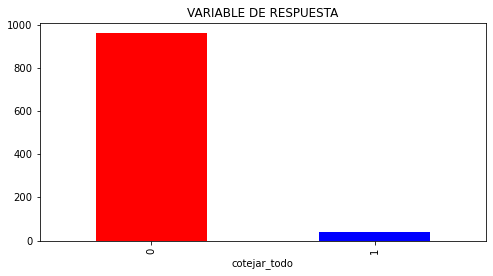

0    959
1     41
Name: cotejar_todo, dtype: int64
Numeros de 1 en la data = 41
Numeros de 0 en la data = 959
4.1000000000000005%
95.89999999999999%

In [79]:
plt.figure(figsize = (8,4))
df_col.groupby("cotejar_todo").Region.count().plot.bar(ylim=0, color= ["red", "blue"])
plt.title("VARIABLE DE RESPUESTA")
plt.show()
print(pd.value_counts(df_col.cotejar_todo))
print("Numeros de 1 en la data = %i"%len(df_col[df_col.cotejar_todo==1]))
print("Numeros de 0 en la data = %i"%len(df_col[df_col.cotejar_todo==0]))
print((len(df_col[df_col.cotejar_todo==1])/len(df_col.cotejar_todo))*100, end="%")
print("")
print((len(df_col[df_col.cotejar_todo==0])/len(df_col.cotejar_todo))*100, end="%")

### Cotejamos contra las companias Fintech Colombia 

Most positive correlations : 

 Company Type_For Profit        2.172158
Company Type_For Profit        2.172158
Operating Status_Active        2.814009
IPO Status_Private             2.999231
Number of Employees_11-50      3.805016
Region_ Antioquia              4.426329
City_Medellín                  5.746937
City_Cundinamarca              6.868228
City_Chía                      8.342789
cotejar_todo                 100.000000
Name: cotejar_todo, dtype: float64
Most negative correlations : 

 Number of Employees_1001-5000   -4.014776
City_Madrid                     -3.174454
Number of Employees_10001+      -2.999231
Name: cotejar_todo, dtype: float64
(875, 9)
(875,)


C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


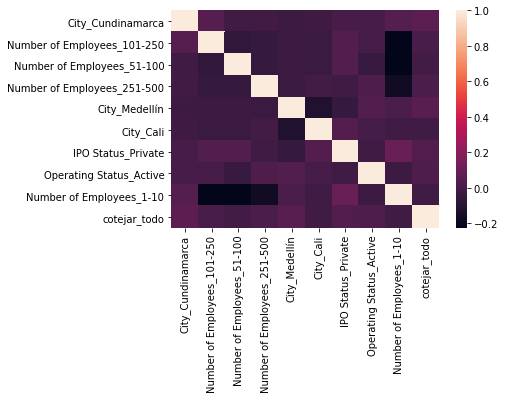

In [87]:
df_var_inciden = df_col[["Organization Name", "City","Region","Total Funding Amount","Estimated Revenue Range", "Operating Status","Company Type","Number of Articles", "Number of Founders", "Number of Employees","Number of Funding Rounds","Funding Status", "Number of Lead Investors", "Number of Investors", "IPO Status", "G2 Stack - Total Products Active","cotejar_todo"  ]]
def dropi (data):
    for i in data:
        if data[i].isnull().sum()>= len(data[i])*0.3 :
            data.drop([i], axis= 1, inplace=True)
            
dropi(df_var_inciden)

df_var_inciden = df_var_inciden.dropna()
cols_to_modify = ["City","Region","Operating Status","Company Type","Company Type","IPO Status","Number of Employees"]
cols_to_keep = list(set(df_var_inciden.columns.values).difference(cols_to_modify))
df_col_new= pd.get_dummies(df_var_inciden, columns= cols_to_modify)
correlations = df_col_new.corr()["cotejar_todo"].sort_values()
print("Most positive correlations : \n\n",correlations.tail(10)*100 )
print("Most negative correlations : \n\n",correlations.head(3)*100 )
df_col_new= df_col_new[["City_Cundinamarca", "Number of Employees_101-250","Number of Employees_51-100","Number of Employees_251-500","City_Medellín","City_Cali","IPO Status_Private","Operating Status_Active","Number of Employees_1-10","cotejar_todo"]]
sns.heatmap(df_col_new.corr())
X =  df_col_new[["City_Cundinamarca", "Number of Employees_101-250","Number of Employees_51-100","Number of Employees_251-500","City_Medellín","City_Cali","IPO Status_Private","Operating Status_Active","Number of Employees_1-10"]]
# TARGET 
y= df_col_new["cotejar_todo"]

print(X.shape)
print(y.shape)



### Hagamos la regresión Logistica

In [88]:

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [89]:
model = linear_model.LogisticRegression()
model.fit(X,y)
predictions = model.predict(X)
print(model.score(X,y))

0.9565714285714285


In [90]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.961429 (0.023947)


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [91]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions)) # las que estan por fuera de la diagonal son las que hizo mal 
print(classification_report(Y_validation, predictions)) # soporte las validaciones, recall el % de acierto 

0.9371428571428572
[[164   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       164
           1       0.00      0.00      0.00        11

    accuracy                           0.94       175
   macro avg       0.47      0.50      0.48       175
weighted avg       0.88      0.94      0.91       175



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Como podemos observar en la matriz de confusion los 1 es decir que pertenecen a Fintech no predijo ninguno por esto el recall es 0, debemos balancear la data 

In [92]:
model = linear_model.LogisticRegression(class_weight="balanced")
model.fit(X,y)
predictions = model.predict(X)
print(model.score(X,y))

0.7474285714285714


In [93]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.708571 (0.133585)


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [94]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions)) # las que estan por fuera de la diagonal son las que hizo mal 
print(classification_report(Y_validation, predictions)) # soporte las validaciones, recall el % de acierto

0.7485714285714286
[[127  37]
 [  7   4]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       164
           1       0.10      0.36      0.15        11

    accuracy                           0.75       175
   macro avg       0.52      0.57      0.50       175
weighted avg       0.89      0.75      0.81       175



## Auque al balancear la data el score del modelo bajó pudimos observar que la presición subió y el recall de data que es fintech ya no es 0% , est nos indica que este modelo  es mejor con accurancy 0.75